Welcome to the **Using Factories and Fakes** lab. 

You often need fake data to test against. 

Of course, you can use some hard-coded sample data in your tests. 

But what if you need 100, or even 1000, of records of test data? 

That can get tedious to create and maintain.

In this lab, you’re going to see how to use a popular python package called `FactoryBoy` to provide fake data for testing.

# Learning Objectives

After completing this lab, you will be able to:
* Summarize how to create a `Factory` class
* Use the `Faker` class and `Fuzzy attributes` to provide realistic test data
* Write test cases that use `Factory` classes to provide test data`

# Set Up the Lab Environment

## Clone the Code Repo

Now get the code that you need to test. 

To do this, use the `git clone` command to clone the git repository: `git clone https://github.com/ibm-developer-skills-network/duwjx-tdd_bdd_PracticeCode.git`

## Change into the Lab Folder

Once you have cloned the repository, change to the lab directory: `cd duwjx-tdd_bdd_PracticeCode/labs/05_factories_and_fakes`

## Install Python Dependencies

The final preparation step is to use `pip` to install the Python packages needed for the lab: `python3.8 -m pip install -r requirements.txt`

You are now ready to start the lab.

# Navigate to the Code

In the IDE, navigate to the `duwjx-tdd_bdd_PracticeCode/labs/05_factories_and_fakes folder`. 

This folder contains all of the source code that you will use for this lab.

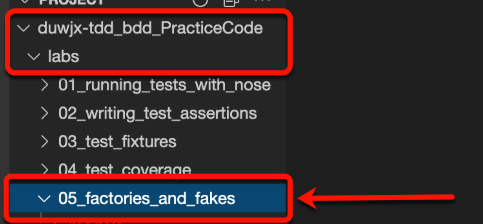

# Step 1: Run nosetests

Before you make any changes to your code, you should check that all of the test cases are passing. 

Otherwise, if you encounter failing test cases later, you won’t know if you caused them to fail or if they were failing before you changed anything.

Run `nosetests` and make sure that all of the tests pass with **`100%` test coverage**.

You should see the following output:

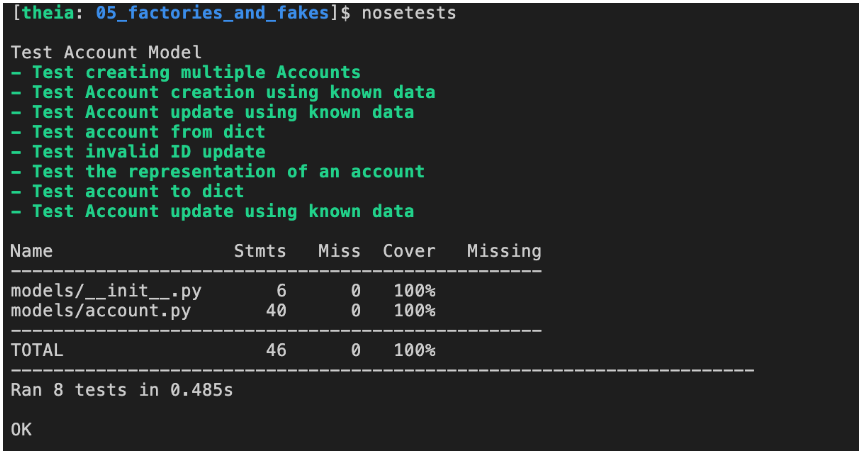

**All tests are colored green!**

This means they all pass, so you can now move on to modifying the code.

# Step 2: Create an AccountFactory class

In this step, you will create an `AccountFactory` class.

Open the `models/account.py` file to familiarize yourself with the attributes of the `Account` class. 

These are the same attributes that you will need to add to the `AccountFactory` class.

Open the `tests/factories.py` file in the IDE editor. 

This is the file in which you will add the attributes of the Account class to the `AccountFactory` class.

You want to take advantage of the fact that **FactoryBoy** comes with the `Faker` class. 

This class has Fake providers and a number of `Fuzzy attributes`.

Here are some useful providers for the `Faker` class:
```
Faker("name")
Faker("email")
Faker("phone_number")
```

Here are some `Fuzzy attributes` you might find useful:
```
FuzzyChoice(choices=[True, False])
FuzzyDate(date(2008, 1, 1))
```

## Your Task

Use the `Faker` providers and `Fuzzy attributes` to create fake data for the `id`, `name`, `email`, `phone_number`, `disabled`, and `date_joined` fields by adding them to the `AccountFactory` class.

## Solution (`factories.py`)

```
class AccountFactory(factory.Factory):
    """ Creates fake Accounts """

    class Meta:
        model = Account

    id = factory.Sequence(lambda n: n)
    name = factory.Faker("name")
    email = factory.Faker("email")
    phone_number = factory.Faker("phone_number")
    disabled = FuzzyChoice(choices=[True, False])
    date_joined = FuzzyDate(date(2008, 1, 1))
```

# Step 3: Update the Test Cases

In this step, you will update the test cases to use the new `AccountFactory` that you created in the previous step.

Open the `tests/test_account.py` file. 

Then add the following **import** near the top of the file, after the other **imports**. 

This will import your new `AccountFactory` class from the `factories` module: `from factories import AccountFactory`

In the remaining steps, your goal is to change all references to `Account` so that they now use `AccountFactory`. 

You will do this one test at a time.

## Your Task

Start with the `test_create_all_accounts()` test:
* Remove the references to `ACCOUNT_DATA` and `Account` and replace them with `AccountFactory`.
* Change the code to create **10 Accounts**.

## Solution (`factories.py`)

```
    def test_create_all_accounts(self):
        """ Test creating multiple Accounts """
        for _ in range(10):
            account = AccountFactory()
            account.create()
        self.assertEqual(len(Account.all()), 10)
```

## Run the Tests

Run `nosetests` to make sure the test cases still pass.

# Step 4: Update test_create_an_account()

In this step, you will update the `test_create_an_account()` test.

## Your Task

In `test_account.py` modify the code in the `test_create_an_account()` test to remove the references to `ACCOUNT_DATA` and `Account` and replace them with `AccountFactory`.

## Solution (`factories.py`)

```
    def test_create_an_account(self):
        """ Test Account creation using known data """
        account = AccountFactory()
        account.create()
        self.assertEqual(len(Account.all()), 1)
```

## Run the Tests

Run `nosetests` to make sure the test cases still pass.

# Step 5: Update test_to_dict()

In this step, you will update the `test_to_dict()` test.

## Your Task

In `test_account.py` modify the code in the `test_to_dict()` test to remove the references to `ACCOUNT_DATA` and `Account` and replace them with `AccountFactory`.

## Solution (`factories.py`)

```
    def test_to_dict(self):
        """ Test account to dict """
        account = AccountFactory()
        result = account.to_dict()
        self.assertEqual(account.name, result["name"])
        self.assertEqual(account.email, result["email"])
        self.assertEqual(account.phone_number, result["phone_number"])
        self.assertEqual(account.disabled, result["disabled"])
        self.assertEqual(account.date_joined, result["date_joined"])
```

## Run the Tests

Run `nosetests` to make sure the test cases still pass.

# Step 6: Update test_from_dict()

In this step, you will update the `test_from_dict()` test.

## Your Task

In `test_account.py` modify the code in the `test_from_dict()` test to remove the references to `ACCOUNT_DATA` and `Account` and replace them with `AccountFactory`.

## Solution (`factories.py`)

```
    def test_from_dict(self):
        """ Test account from dict """
        data = AccountFactory().to_dict()
        account = Account()
        account.from_dict(data)
        self.assertEqual(account.name, data["name"])
        self.assertEqual(account.email, data["email"])
        self.assertEqual(account.phone_number, data["phone_number"])
        self.assertEqual(account.disabled, data["disabled"])
```

## Run the Tests

Run `nosetests` to make sure the test cases still pass.

# Step 7: Update test_update_an_account()

In this step, you will update the `test_update_an_account()` test.

## Your Task

In `test_account.py` modify the code to in the `test_update_an_account()` test to remove the references to `ACCOUNT_DATA` and `Account` and replace with `AccountFactory`.

## Solution (`factories.py`)

```
    def test_update_an_account(self):
        """ Test Account update using known data """
        account = AccountFactory()
        account.create()
        self.assertIsNotNone(account.id)
        account.name = "Rumpelstiltskin"
        account.update()
        found = Account.find(account.id)
        self.assertEqual(found.name, account.name)
```

## Run the Tests

Run `nosetests` to make sure the test cases still pass.

# Step 8: Update test_invalid_id_on_update()

In this step, you will update the `test_invalid_id_on_update()` test.

## Your Task

In `test_account.py` modify the code in the `test_invalid_id_on_update()` test to remove the references to `ACCOUNT_DATA` and `Account` and replace them with `AccountFactory`.

## Solution (`factories.py`)

```
    def test_invalid_id_on_update(self):
        """ Test invalid ID update """
        account = AccountFactory()
        account.id = None
        self.assertRaises(DataValidationError, account.update)
```

## Run the Tests

Run `nosetests` to make sure the test cases still pass.

# Step 9: Update test_delete_an_account()

In this step, you will update the `test_delete_an_account()` test.

## Your Task

In `test_account.py` modify the code in the `test_delete_an_account()` test to remove the references to `ACCOUNT_DATA` and `Account` and replace them with `AccountFactory`.

## Solution (`factories.py`)

```
    def test_delete_an_account(self):
        """ Test Account update using known data """
        account = AccountFactory()
        account.create()
        self.assertEqual(len(Account.all()), 1)
        account.delete()
        self.assertEqual(len(Account.all()), 0)
```

## Run the Tests

Run `nosetests` to make sure the test cases still pass.

# Step 10: Remove ACCOUNT_DATA references

Since you have replaced all instances of `ACCOUNT_DATA` with `AccountFactory`, you can clean up the code. 

In `test_account.py` you will remove all remaining references to `ACCOUNT_DATA` and remove the lines that load it from the `JSON` data file.

## Task A

Remove **line 31** from `setUp()`: `self.rand = randrange(0, len(ACCOUNT_DATA))`

```
    def setUp(self):
        """Truncate the tables"""
        db.session.query(Account).delete()
        db.session.commit()
```

## Task B

Remove **lines 20-22** from `setUpClass()`:
```
global ACCOUNT_DATA
with open('tests/fixtures/account_data.json') as json_data:
    ACCOUNT_DATA = json.load(json_data)
```

```
    @classmethod
    def setUpClass(cls):
        """ Load data needed by tests """
        db.create_all()  # make our sqlalchemy tables
```

You can also delete **line 11** that declares `ACCOUNT_DATA`: `ACCOUNT_DATA = {}`   # delete this line

## Task C

Finally, delete **lines 4-5**, which import `json` and `randrange`:
```
import json
from random import randrange
```

## Run the Tests

Save your changes and run `nosetests` one last time to make sure that the test cases still pass.

You should see the following results:

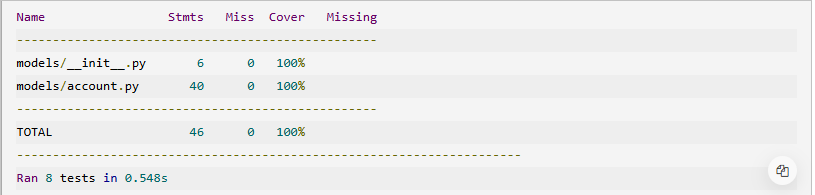